In [ ]:
# importing required modules 
from zipfile import ZipFile

# specifying the zip file name 
file_name = "/content/drive/MyDrive/Datasets/parlerData.zip"

# opening the zip file in READ mode 
with ZipFile(file_name, 'r') as zip: 
	# printing all the contents of the zip file 
	zip.printdir() 

	# extracting all the files 
	print('Extracting all the files now...') 
	# zip.extractall('/content/drive/MyDrive/Datasets/parlerData') 
    zip.extractall() 
	print('Done!')

File Name                                             Modified             Size
parler_postsData.csv                           2021-01-20 10:53:32     63566216
parler_userData.csv                            2021-01-20 10:53:36      4437079
Extracting all the files now...
Done!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from queue import PriorityQueue
import plotly.express as px

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#posts data
CreatedAT <t> : only <b>int</b> data type <br>
Creator <t> : 101945 - 101938 = 7 null

-----

#users data
Score, Joined, Interactions : only <b>int</b> data type<br>
Name <t> : 22326 - 22325 = 1 null<br>
Bio <t> : 22326 - 17015 = 5311 null<br>

---
---
---
#Post data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101945 entries, 0 to 101944<br>
Data columns (total 9 columns):<br>

| #  | Column      | Non-Null Count  | Dtype 
|----|-------------|-----------------|-------
| 0  | Impressions | 101945 non-null | object
| 1  | Id          | 101945 non-null | object
| 2  | Upvotes     | 101945 non-null | object
| 3  | At          | 101945 non-null | object
| 4  | Comments    | 101945 non-null | object
| 5  | Reposts     | 101945 non-null | object
| 6  | CreatedAt   | 101945 non-null | int64 
| 7  | Body        | 101944 non-null | object
| 8  | Creator     | 101938 non-null | object

dtypes: int64(1), object(8)<br>
memory usage: 7.0+ MB<br>

-----
#User data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22326 entries, 0 to 22325<br>
Data columns (total 9 columns):


| #  | Column       | Non-Null Count | Dtype 
|----|--------------|----------------|-------
| 0  | Name         | 22325 non-null | object
| 1  | Score        | 22326 non-null | int64 
| 2  | Id           | 22326 non-null | object
| 3  | Bio          | 17015 non-null | object
| 4  | Joined       | 22326 non-null | int64 
| 5  | Username     | 22326 non-null | object
| 6  | Interactions | 22326 non-null | int64 
| 7  | Human        | 22326 non-null | bool  
| 8  | Verified     | 22326 non-null | bool  


dtypes: bool(2), int64(3), object(4)<br>
memory usage: 1.2+ MB

In [ ]:
working_directory = "/content/drive/MyDrive/Datasets/parlerData"
# working_directory = '/content'

class preprocessing :
    def __init__(self,working_dir) :
        self.post_df = pd.read_csv(working_dir + '/parler_postsData.csv')
        self.user_df = pd.read_csv(working_dir + '/parler_userData.csv')
        self.post_df['Upvotes'] = self.post_df['Upvotes'].apply(lambda x : int(self.str_2_float(x)) )
        self.user_df['Interactions'] = pd.to_numeric(self.user_df['Interactions'])
        # self.post_df.info()
        # self.user_df.info()

    def get_UserName_verified_details(self, df) :
        mappings = self.user_df.set_index('Id').T.to_dict('records')

        UID = df.index

        df['Username'] = UID.map(mappings[4])                                   # UserName
        df['Human'] = UID.map(mappings[6])                                      # Human
        df['Verified'] = UID.map(mappings[7])                                   # Verified

        return df
    
    def str_2_float(self, x) :
        if('k' in x) :
            num = float(x[:x.index('k')]) * 1000
        else :
            num = float(x)

        return num

    def plot_bar_graph_MultiColor(self, df , y_label , y_header) :
        df['color'] = (df['Human'] * 10) + (df['Verified'] * 1)
        color_dict = {0 : (0, 0, 0) , 1 : (1, 0, 0) , 10 : (0, 0, 1) , 11 : (0, 1, 0)}

        fig = plt.figure(figsize=(df.shape[0], 5))
        plt.bar(df['Username'], df[y_header], color = df['color'].map(color_dict).to_list() , width = 0.7) 

        plt.xlabel("Usernames") 
        plt.ylabel(y_label) 
        plt.title("Bar graph of " + y_label + " per user for top " + str(df.shape[0]) + " users.")

        plt.xticks(rotation=45)

        handle = [plt.Rectangle((0,0),1,1, color = color_dict[i]) for i in color_dict]
        labels = ['Neither verified nor human' , 'Verified but not human' , 'Human but not verified' , 'Verified Human']

        plt.legend(handle , labels)
        plt.show() 

    def plot_bar_graph(self, X , Y , x_label , y_label ) :
        fig = plt.figure(figsize=(len(X), 5))
        plt.bar(X, Y, width = 0.7) 

        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title("Bar graph of top "+ str(len(X)) + " " + x_label + " based upon " + y_label)

        plt.xticks(rotation=45)

        plt.show()

    def question_1(self, n = 10) :
        UIDrank_numContent = self.post_df['Creator'].value_counts()[:n]            # UID ranking based upon number of content
        UID_post_df = UIDrank_numContent.to_frame(name = 'postCounts') * 100 / self.post_df.shape[0]

        top_n_content_df = self.get_UserName_verified_details(UID_post_df)
        print('There are' , top_n_content_df['postCounts'].sum() , '% of posts posted by top' , n , 'users')

        self.plot_bar_graph_MultiColor(top_n_content_df , 'Percentage of content posted' , 'postCounts')

    def question_2a(self, n) :
        #------------------------------ bar graph based on number of upvotes per username ------------------------------
        # UIDrank_Upvotes = self.post_df[['Creator' , 'Upvotes']].groupby(['Creator']).agg(['sum'])
        # UIDrank_Upvotes.columns = ['Upvotes_sum']                                    # reducing multi_index to columns
        # UIDrank_Upvotes = UIDrank_Upvotes.sort_values(by=['Upvotes_sum'] , ascending = False )[:n]

        # top_n_upvotes_df = self.get_UserName_verified_details(UIDrank_Upvotes)
        # self.plot_bar_graph_MultiColor(top_n_upvotes_df , 'Upvotes posted' , 'Upvotes_sum')

        #------------------------------ bar graph based on score per username ------------------------------
        UIDrank_Upvotes = self.user_df[['Id' , 'Score']].groupby(['Id']).agg(['sum'])
        UIDrank_Upvotes.columns = ['Upvotes_sum']                                    # reducing multi_index to columns
        UIDrank_Upvotes = UIDrank_Upvotes.sort_values(by=['Upvotes_sum'] , ascending = False )[:n]

        top_n_upvotes_df = self.get_UserName_verified_details(UIDrank_Upvotes)
        # print(top_n_upvotes_df)
        self.plot_bar_graph_MultiColor(top_n_upvotes_df , 'Number of Upvotes' , 'Upvotes_sum')

    def question_2b(self, n) :
        #------------------------------ bar graph based on number of interactions per username ------------------------------
        UIDrank_Interactions = self.user_df[['Id' , 'Interactions']].groupby(['Id']).agg(['sum'])
        UIDrank_Interactions.columns = ['Interaction_sum']                                    # reducing multi_index to columns
        UIDrank_Interactions = UIDrank_Interactions.sort_values(by=['Interaction_sum'] , ascending = False )[:n]

        top_n_Interactions_df = self.get_UserName_verified_details(UIDrank_Interactions)
        self.plot_bar_graph_MultiColor(top_n_Interactions_df , 'Number of Interactions' , 'Interaction_sum')
        return top_n_Interactions_df

    def question_2c(self, n) :
        # ------------------------------ bar graph based on number of interactions per username ------------------------------
        UID_mentioned_freq = {}
        
        for datapoint in self.post_df['At'] :
            for UID in json.loads(datapoint.replace("'" , '"')).values() :
                if(UID in UID_mentioned_freq) :
                    UID_mentioned_freq[UID] += 1
                else :
                    UID_mentioned_freq[UID] = 1

        UIDrank_freq_dict = {k : UID_mentioned_freq[k] for k in sorted(UID_mentioned_freq , key = UID_mentioned_freq.get , reverse = True)[:n]}
        UIDrank_mentions = pd.DataFrame.from_dict(UIDrank_freq_dict , orient = 'index' , columns = ['Mentions_count'])

        top_n_mentions_df = self.get_UserName_verified_details(UIDrank_mentions)
        self.plot_bar_graph_MultiColor(top_n_mentions_df , 'Number of Mentions' , 'Mentions_count')

    def word_cloud_plot(self, word_cloud_sentence) :
        # wordcloud = WordCloud(background_color ='white', stopwords = set(STOPWORDS)).generate(word_cloud_sentence)
        wordcloud = WordCloud(width = 1200, height = 600, background_color ='white', stopwords = set(STOPWORDS)).generate(word_cloud_sentence)
        # wordcloud = WordCloud(width = 1200, height = 600, background_color ='white', stopwords = set(STOPWORDS), min_font_size = 10).generate(word_cloud_sentence)

        plt.figure()
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()

    def question_2d(self, df) :
        mappings = self.user_df.set_index('Id').T.to_dict('records')
        UID = df.index

        df['Bio'] = UID.map(mappings[2])                                   # UserName

        word_cloud_sentence = ""
        punctuations = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'                 # string.punctuations - {'#' , '@'}
        for bio_txt in df['Bio'] :
            if(bio_txt is not np.nan) :
                # print(bio_txt)
                bio_txt = bio_txt.replace("\\n" , " " ).translate(str.maketrans("","",punctuations))
                # tokens = nltk.tokenize.word_tokenize(bio_txt)
                cleaned_tokens = []
                for token in bio_txt.split() :
                    if(token[0] in ['#' , '@']) :
                        continue
                    if(token[:4] == 'http') :
                        continue
                    cleaned_tokens.append(token)
                # print(cleaned_tokens)

                word_cloud_sentence += " ".join([x.lower() for x in cleaned_tokens])

        self.word_cloud_plot(word_cloud_sentence)

    def question_2(self, n = 10) :
        self.question_2a(n)
        # -------------- TODO 
        # UIDrank_Upvotes = self.user_df[['Id' , 'Score']].sort_values(by=['Score'] , ascending = False )[:n]

        # top_n_upvotes_df = self.get_UserName_verified_details(UIDrank_Upvotes)
        # print(top_n_upvotes_df)
        # self.plot_bar_graph_MultiColor(top_n_upvotes_df , 'Upvotes score' , 'Score')
        top_n_Interactions_df = self.question_2b(n)
        self.question_2c(n)

        self.question_2d(top_n_Interactions_df)

    def get_top_n(self , n , pq) :
        top_n_X = []
        top_n_Y = []

        while not pq.empty() :
            if(len(top_n_X) >= n) :
                break
            word_freq = pq.get()
            top_n_X.append(word_freq[1])
            top_n_Y.append(-1 * word_freq[0])

        return top_n_X , top_n_Y

    def question_3a(self) :
        word_cloud_sentence = ""
        punctuations = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'                 # string.punctuations - {'#' , '@'}
        total_words = {}

        for bio_txt in self.post_df['Body'] :
            if(bio_txt is not np.nan) :
                bio_txt = bio_txt.replace("\\n" , " " ).translate(str.maketrans("","",punctuations))
                # tokens = nltk.tokenize.word_tokenize(bio_txt)
                # cleaned_tokens = []
                txt_word = {}
                for token in bio_txt.split() :
                    token = token.lower()
                    if('#' in token or '@' in token or token[:4] == 'http') :
                        continue
                    if(token.isalpha()) :
                        if(token not in txt_word) :
                            txt_word[token] = 1
                        else :
                            txt_word[token] += 1
                        # cleaned_tokens.append(token)
                
                for word in txt_word :
                    if(word not in total_words) :
                        total_words[word]  = txt_word[word]
                    else :
                        total_words[word] += txt_word[word]

                word_cloud_sentence += " ".join(txt_word.keys())

        self.word_cloud_plot(word_cloud_sentence)

        # global_token = nltk.tokenize.word_tokenize(word_cloud_sentence)
        # global_token = word_cloud_sentence.split()

        word_rank = PriorityQueue()

        for word in total_words :
            if(len(word) > 1 and word not in set(STOPWORDS)) :
                word_rank.put((-1 * total_words[word] , word))

        return word_rank

    def question_3b(self) :
        punctuations = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~'                 # string.punctuations - {'#' , '@'}
        hastags = {}

        for bio_txt in self.post_df['Body'] :
            if(bio_txt is not np.nan) :
                # print(bio_txt)
                bio_txt_list = bio_txt.replace("\\n" , " " ).translate(str.maketrans("","",punctuations)).split()
                # tokens = nltk.tokenize.word_tokenize(bio_txt)
                cleaned_tokens = []
                txt_hastag = {}
                
                for token in bio_txt_list :
                    token = token.lower()
                    if(token[:4] == 'http' or token[0] == '@') :
                        continue
                    if(token[0] in '#') :
                        # print(token)
                        if(token[1:] not in txt_hastag) :
                            txt_hastag[token[1:]] = 1
                        else :
                            txt_hastag[token[1:]] += 1
                    else :
                        cleaned_tokens.append(token)
                
                word_len = len(cleaned_tokens)
                cleaned_tokens = []
                for i in txt_hastag :
                    if(i not in hastags) :
                        hastags[i]  = np.array([txt_hastag[i] , txt_hastag[i] * word_len])                # TODO : check this out
                    else :
                        hastags[i] += np.array([txt_hastag[i] , txt_hastag[i] * word_len])                # TODO : check this out

        # print(hastags)
        hastag_rank_freq = PriorityQueue()
        hastag_rank_post = PriorityQueue()

        for hastag in hastags :
                hastag_rank_freq.put((-1 * hastags[hastag][0] , hastag))
                hastag_rank_post.put((-1 * hastags[hastag][1] // hastags[hastag][0] , hastag))

        return hastag_rank_freq , hastag_rank_post
        

    def question_3(self, n = 10) :
        #------------------------------ Word cloud ------------------------------
        top_words = self.question_3a()

        #------------------------------ bar graph based on number of occurrences per word ------------------------------
        top_n_words , top_n_freq = self.get_top_n(n,top_words)
        self.plot_bar_graph(top_n_words , top_n_freq , "Words" , "Number of occurance")

        #------------------------------ bar graph based on hastags ------------------------------
        hastag_rank_freq , hastag_rank_post = self.question_3b()

        # ------------------------------- ranking top n hastags based upon number of occurance -------------------------------
        top_n_hastag , top_n_freq = self.get_top_n(n,hastag_rank_freq)
        self.plot_bar_graph(top_n_hastag , top_n_freq , "Hastags" , "Number of occurance")

        # ------------------------------- ranking top n hastags based upon average post length -------------------------------
        top_n_hastag , top_n_avg_post_len = self.get_top_n(n , hastag_rank_post)
        self.plot_bar_graph(top_n_hastag , top_n_avg_post_len , "Hastags" , "Average post length")


    def set_precision_args(self , label) :
        if(label == 'year') :
            return 10 ** 10 , '%Y'
        if(label == 'month') :
            return 10 ** 8 , '%Y%m'
        if(label == 'date') :
            return 10 ** 6 , '%Y%m%d'
        if(label == 'hour') :
            return 10 ** 4 , '%Y%m%d%H'
        if(label == 'minute') :
            return 10 ** 2 , '%Y%m%d%H%M'
        if(label == 'second') :
            return 1 , '%Y%m%d%H%M%S'

    def question_4a(self , precision_label = 'date') :
        if(precision_label not in ['year' , 'month' , 'date' , 'hour' , 'minute' , 'second']) :
            print('Not adequate precision')
            return
        div , frmt = self.set_precision_args(precision_label)

        self.post_df['datetime'] = (pd.to_datetime(self.post_df['CreatedAt'] // div , format= frmt, errors='ignore'))
        df = self.post_df[['datetime' , 'Id']].groupby(['datetime']).agg(['count'])

        df = df.reset_index()
        df.columns = ['datetime' , 'new_post_count']

        fig = px.line(df, x='datetime', y='new_post_count')
        fig.show()

    def question_4b(self , precision_label = 'date') :
        if(precision_label not in ['year' , 'month' , 'date' , 'hour' , 'minute' , 'second']) :
            print('Not adequate precision')
            return
        div , frmt = self.set_precision_args(precision_label)

        self.user_df['datetime'] = pd.to_datetime(self.user_df['Joined'] // div , format= frmt, errors='ignore')
        df = self.user_df[['datetime' , 'Id']].groupby(['datetime']).agg(['count'])

        df = df.reset_index()
        df.columns = ['datetime' , 'new_user_count']

        fig = px.line(df, x='datetime', y='new_user_count')
        fig.show()

    def question_4(self , precision_label = 'date') :
        self.question_4a(precision_label)
        self.question_4b(precision_label)


preprocessor = preprocessing(working_directory)

# Question 1

There are 16.60601304625043 % of posts posted by top 10 users


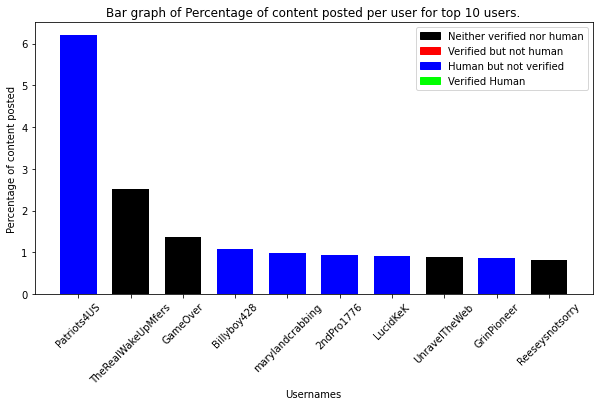

In [ ]:
preprocessor.question_1()

# Question 2

If you want to run the whole question 2 in one go, use<br>

```
preprocessor.question_2()
```

However every bellow mentioned cell solves the problem in divided categories.<br>
Where I have hard coded the n value as 10. you can change it for diffrent values.

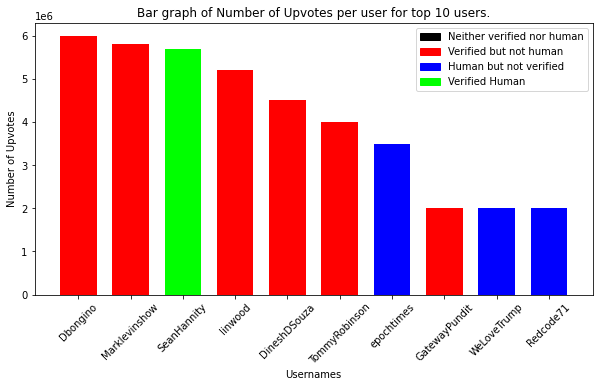

In [ ]:
preprocessor.question_2a(10)

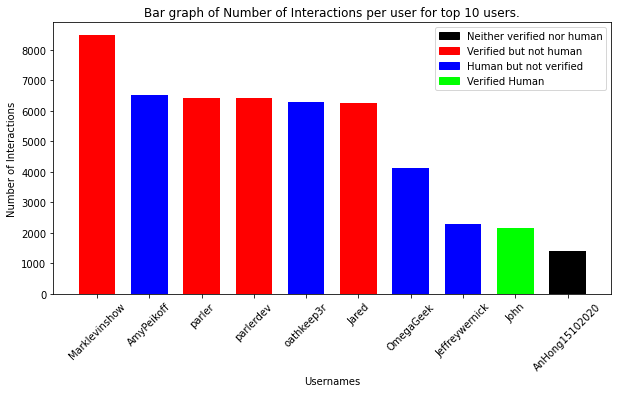

In [ ]:
top_n_Interactions_df = preprocessor.question_2b(10)

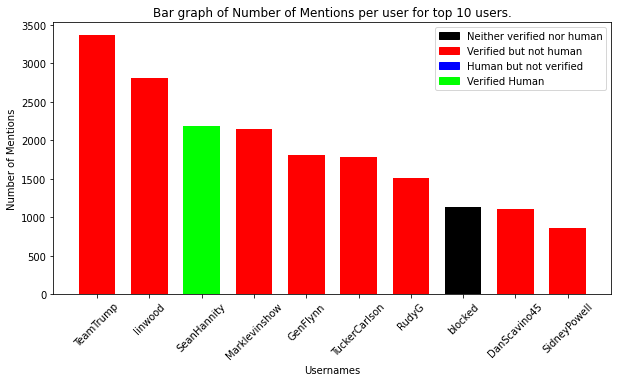

In [ ]:
preprocessor.question_2c(10)

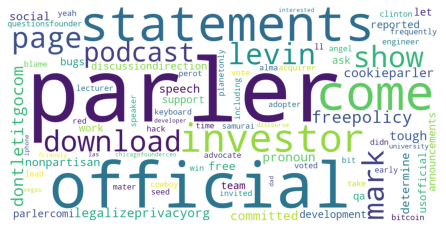

In [ ]:
preprocessor.question_2d(top_n_Interactions_df)

# Question 3

If you want to run the whole question 3 in one go, use<br>

```
preprocessor.question_3()
```

However every bellow mentioned cell solves the problem in divided categories.<br>
Where I have hard coded the n value as 10. you can change it for diffrent values.


Assumptions:<br>
•	Both word and hashtags are used in lower case.<br>
•	Emoticons (i.e., word with len 1) are ignored.

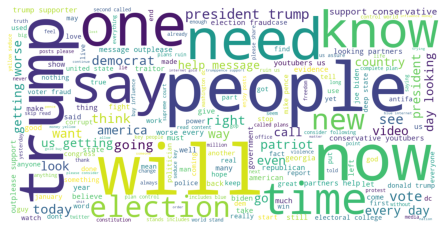

In [ ]:
top_words = preprocessor.question_3a()

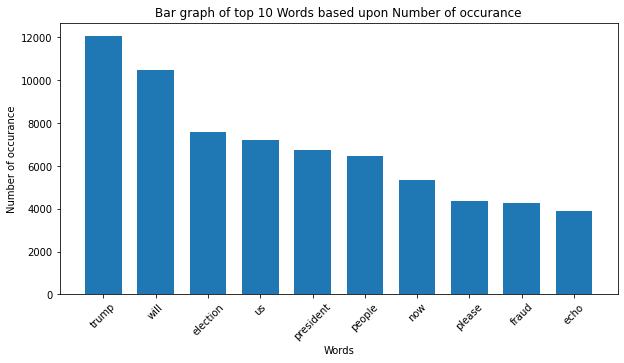

In [ ]:
top_n_words , top_n_freq = preprocessor.get_top_n(10,top_words)
preprocessor.plot_bar_graph(top_n_words , top_n_freq , "Words" , "Number of occurance")

In [ ]:
hastag_rank_freq , hastag_rank_post = preprocessor.question_3b()

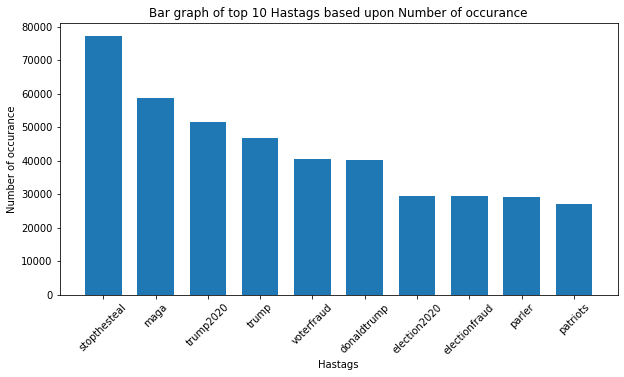

In [ ]:
top_n_hastag , top_n_freq = preprocessor.get_top_n(10 ,hastag_rank_freq)
preprocessor.plot_bar_graph(top_n_hastag , top_n_freq , "Hastags" , "Number of occurance")

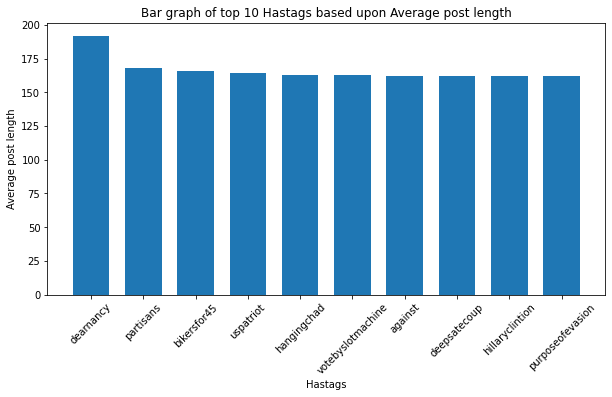

In [ ]:
top_n_hastag , top_n_avg_post_len = preprocessor.get_top_n(10 , hastag_rank_post)
preprocessor.plot_bar_graph(top_n_hastag , top_n_avg_post_len , "Hastags" , "Average post length")

# Question 4

If you want to run the whole question 4 in one go, use<br>

```
preprocessor.question_4()
```

However every bellow mentioned cell solves the problem in divided categories.<br>
Where I have hard coded the precision as 'date'. you can change it for diffrent precision values.

Here precision_label = 'date' means the count is summed up for every date. That means the graph shows number of post posted or user joined on a particular date. Where hour and are in-seprable.

If you want diffrent precision levels, use bellow code


```
preprocessor.question_4('year')
preprocessor.question_4('month')
preprocessor.question_4('date')     # default case
preprocessor.question_4('hour')
preprocessor.question_4('minute')
preprocessor.question_4('second')
```


In [ ]:
preprocessor.question_4a()

In [ ]:
preprocessor.question_4b()